In [1]:
import dash
import dash_html_components as html
import dash_core_components as dcc
import plotly.express as px
from dash.dependencies import Input, Output
import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.offline as pyo
import plotly.graph_objs as go
from collections import OrderedDict 

In [2]:
data = pd.read_csv("C:/Users/um6p/Downloads/patients-maroc (1).csv")
data.head()

,n,sex,age,country,province,disease,group,exposure_start,exposure_end,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,0,male,39.0,Maroc,Casablanca - Settat,NaN,NaN,NaN,NaN,Imported,NaN,NaN,NaN,3/2/20,3/17/20,NaN,Exit
1,1,female,89.0,Maroc,Casablanca - Settat,1.0,NaN,NaN,NaN,Imported,NaN,NaN,NaN,3/5/20,NaN,3/10/20,Deceased
2,2,male,59.0,France,Marrakech - Safi,NaN,NaN,3/7/20,NaN,Imported,NaN,NaN,NaN,3/10/20,3/29/20,NaN,Exit
3,3,female,NaN,France,Marrakech - Safi,NaN,NaN,3/7/20,NaN,Imported,NaN,NaN,NaN,3/11/20,3/29/20,NaN,Exit
4,4,female,1.0,France,Marrakech - Safi,NaN,NaN,3/7/20,NaN,Imported,NaN,NaN,NaN,3/11/20,3/29/20,NaN,Exit


<h2>Identify and handle missing values</h2>

<h3>Identify missing values</h3>

<h4>Count missing values in each column</h4>

In [3]:
missing_data = data.isnull()

In [4]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

n
False    1184
Name: n, dtype: int64

sex
True     1120
False      64
Name: sex, dtype: int64

age
True     1145
False      39
Name: age, dtype: int64

country
True     1174
False      10
Name: country, dtype: int64

province
False    1184
Name: province, dtype: int64

disease
True     1174
False      10
Name: disease, dtype: int64

group
True    1184
Name: group, dtype: int64

exposure_start
True     1172
False      12
Name: exposure_start, dtype: int64

exposure_end
True     1169
False      15
Name: exposure_end, dtype: int64

infection_reason
False    1025
True      159
Name: infection_reason, dtype: int64

infection_order
True     1183
False       1
Name: infection_order, dtype: int64

infected_by
True    1184
Name: infected_by, dtype: int64

contact_number
True    1184
Name: contact_number, dtype: int64

confirmed_date
False    1184
Name: confirmed_date, dtype: int64

released_date
True     1178
False       6
Name: released_date, dtype: int64

deceased_date
True     1173
False   

<b>Supprimer des données</b>
d'apres les resultats qu'on a obtenu :
<ol>
    <li>"sex": sup 90% missing data</li>
    <li>"age":sup 90% missing data</li>
    <li>"country": sup 90% missing data</li>
    <li>"disease" : sup 90% missing data</li>
    <li>"group": sup 90% missing data</li>
    <li>"exposure_start": sup 90% missing data</li>
    <li>"exposure_end": sup 90% missing data</li>
    <li>"infection_order": sup 90% missing data</li>
    <li>"infected_by": sup 90% missing data</li>
    <li>"contact_number": sup 90% missing data</li>
    <li>"released_date": sup 90% missing data</li>
    <li>"deceased_date": sup 90% missing data</li>
</ol>
On ne peut pas affecter aucune correction des données, donc on doit supprimer tout ces colonnes.

In [5]:
new_data = data.drop(["sex","age","country","disease","group","exposure_start","exposure_end","infection_order","infected_by","contact_number","released_date","deceased_date"], axis=1)
new_data.head()

,n,province,infection_reason,confirmed_date,state
0,0,Casablanca - Settat,Imported,3/2/20,Exit
1,1,Casablanca - Settat,Imported,3/5/20,Deceased
2,2,Marrakech - Safi,Imported,3/10/20,Exit
3,3,Marrakech - Safi,Imported,3/11/20,Exit
4,4,Marrakech - Safi,Imported,3/11/20,Exit


<b>Remplacer par  frequency</b>
d'apres les resultats qu'on a obtenu :
<ol>
    <li>"infection_reason": 159 missing data</li>
</ol>

In [6]:
new_data['infection_reason'].value_counts()

Local       976
Imported     31
local        13
imported      5
Name: infection_reason, dtype: int64

In [7]:
local = data['infection_reason'].value_counts().idxmax()

In [8]:
new_data['infection_reason'].replace(np.nan,local,inplace=True)

Il y a dans ce colonne les valeurs <strong>L</strong>ocal et <strong>l</strong>ocal, <strong>I</strong>mported et <strong>i</strong>mported qui ont les memes alort on choisi un parmie les deux<br>
replacer par 'Local' car 82% des infection_reason sont Local.<br>
pour confirmed_date on va remplacer la date <strong>03/26/2020</strong> par <strong>3/26/20 </strong>

In [9]:
new_data['infection_reason'].replace("local","Local",inplace=True)
new_data['infection_reason'].replace("imported","Imported",inplace=True)

In [10]:
new_data['confirmed_date'].replace("03/26/2020","3/26/20",inplace=True)

les colonnes province et state va reste inchangé, car les tout ont 0% missing data

In [11]:
new_data.head()

,n,province,infection_reason,confirmed_date,state
0,0,Casablanca - Settat,Imported,3/2/20,Exit
1,1,Casablanca - Settat,Imported,3/5/20,Deceased
2,2,Marrakech - Safi,Imported,3/10/20,Exit
3,3,Marrakech - Safi,Imported,3/11/20,Exit
4,4,Marrakech - Safi,Imported,3/11/20,Exit


<h3>data format</h3>

In [12]:
new_data.dtypes

n                    int64
province            object
infection_reason    object
confirmed_date      object
state               object
dtype: object

Alort, nous obtenons notre data sans missing values et à propre format.

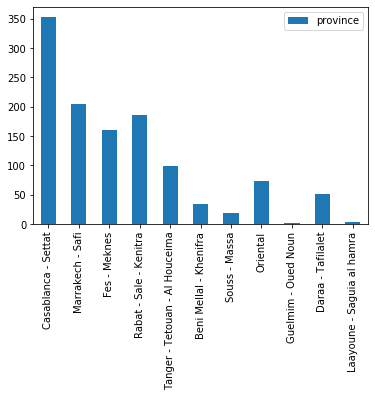

In [13]:
pd.DataFrame(new_data['province'].value_counts(), new_data['province'].unique()).plot.bar()

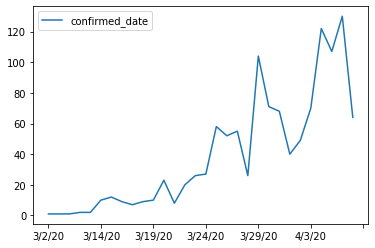

In [14]:
pd.DataFrame(new_data['confirmed_date'].value_counts(), new_data['confirmed_date'].unique()).plot.line()

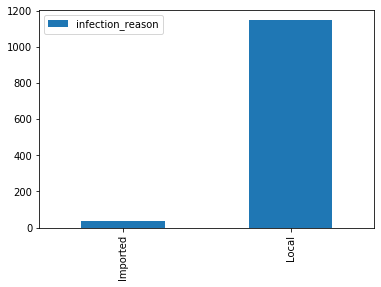

In [15]:
pd.DataFrame(new_data['infection_reason'].value_counts(), new_data['infection_reason'].unique()).plot.bar()

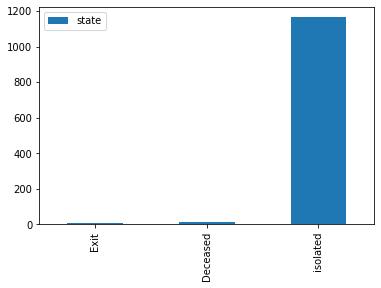

In [16]:
pd.DataFrame(new_data['state'].value_counts(), new_data['state'].unique()).plot.bar()

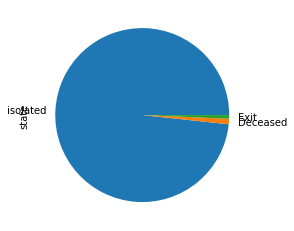

In [17]:
new_data['state'].value_counts().plot.pie()

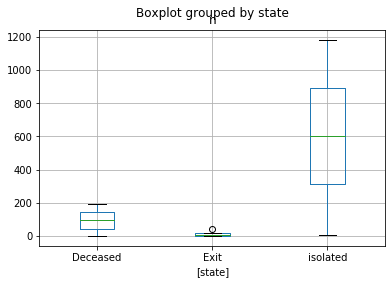

In [18]:
new_data.boxplot(by='state') 

<h2>Analysis of Variance</h2>

On va tester la signification entre les groupes des variables dépandant et la variable indepandant <strong>state</strong> par la methode <strong>ANOVA</strong> on analysant <strong>F-test score</strong> et <strong>P-value</strong> 

L'etude va concerner les provinces : Casablanca - Settat, Marrakech - Safi et Laayoune - Saguia al hamra

A faire

<h3>province</h3>

In [19]:
grb_province=new_data[['province','state']].groupby(['province'], as_index=True)

<h3>confirmed_date</3>

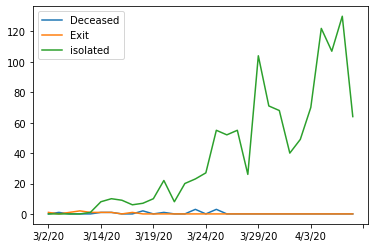

In [20]:
grb_province=new_data[['confirmed_date','state']].groupby(['state'], as_index=True)
confirmed_date = {}
for key in (grb_province.groups.keys()):
    confirmed_date[key] = {}
    for date in new_data['confirmed_date'].unique():
        confirmed_date[key][date]=grb_province.get_group(key).loc[grb_province.get_group(key)['confirmed_date'] == date].count()[0]
pd.DataFrame(confirmed_date).plot()

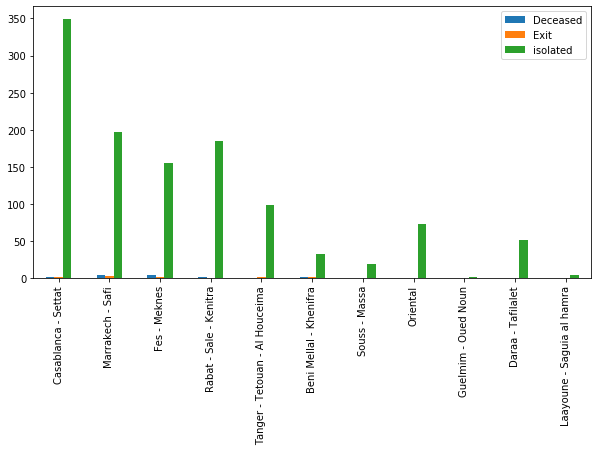

In [21]:
grb_province=new_data[['province','state']].groupby(['state'], as_index=True)
confirmed_date = {}
for key in (grb_province.groups.keys()):
    confirmed_date[key] = {}
    for province in new_data['province'].unique():
        confirmed_date[key][province]=grb_province.get_group(key).loc[grb_province.get_group(key)['province'] == province].count()[0]
pd.DataFrame(confirmed_date).plot.bar(figsize=(10,5))

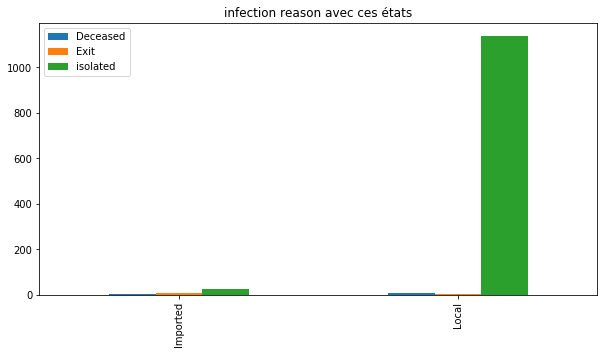

In [22]:
grb_province=new_data[['infection_reason','state']].groupby(['state'], as_index=True)
infection_reason = {}
for key in (grb_province.groups.keys()):
    infection_reason[key] = {}
    for reason in new_data['infection_reason'].unique():
        infection_reason[key][reason]=grb_province.get_group(key).loc[grb_province.get_group(key)['infection_reason'] == reason].count()[0]
pd.DataFrame(infection_reason).plot.bar(figsize=(10,5),title="infection reason avec ces états")

<h1>DASH</h1>

In [60]:
def getDataForEachProvince():
    grb_province=new_data[['province','confirmed_date','state']].groupby(['province'], as_index=True)
    columns = {}
    for key in list(grb_province.groups.keys()):
        columns[key] = {}
        tmp=pd.DataFrame(grb_province.get_group(key))
        for res in tmp['confirmed_date'].value_counts().index:
            columns[key][res] = dict(Exit = tmp[(tmp['confirmed_date'] == res) &  (tmp['state'] == 'Exit')].count()[0],
                                    Deceased = tmp[(tmp['confirmed_date'] == res) &  (tmp['state'] == 'Deceased')].count()[0],
                                    isolated = tmp[(tmp['confirmed_date'] == res) &  (tmp['state'] == 'isolated')].count()[0])
    return columns


def getOptions():
    listOptions = []
    for key in list(getDataForEachProvince().keys()):
        listOptions.append(dict(label = key,value = key))
    return listOptions


def getPie(columnName):
    layout = go.Layout(title = "Diagramme de pie de " + columnName + "au maroc",width=550,height=550)
    fig = go.Figure(data=[go.Pie(labels=new_data[columnName].value_counts().index,values=new_data[columnName].value_counts())],
                   layout=layout)
    return fig

def getStateWithData(column):
    grb_province=new_data[[column,'state']].groupby(['state'], as_index=True)
    columns = {}
    for key in (grb_province.groups.keys()):
        columns[key] = {}
        for date in new_data[column].unique():
            columns[key][date]=grb_province.get_group(key).loc[grb_province.get_group(key)[column] == date].count()[0]
    return columns

def getLinesData(column,layout) :
    lineData = pd.DataFrame(getStateWithData(column))
    traces = [
        go.Scatter(
            x = lineData.index,
            y = lineData[date],
            mode = 'lines',
            name = date
        )for date in lineData.columns]
    layout = go.Layout(title = layout['title'],
                   xaxis_title=layout['x_axis'],
                   yaxis_title=layout['y_axis'],
                    width=600,
                    height=600)
    fig = go.Figure(data = traces, layout = layout)
    return fig

def getBar(column,layout):
    trace = [
        go.Bar(
            x = new_data[column].unique(),
            y = new_data[column].value_counts()
        )
    ]
    
    layout = go.Layout(title = layout['title'],
                   xaxis_title=layout['x_axis'],
                   yaxis_title=layout['y_axis'],
                    width=600,
                    height=600)
    fig = go.Figure(data = trace, layout = layout)
    return fig

def getMulBarsData(column,layout):
    lineData = pd.DataFrame(getStateWithData(column))
    columns = ['isolated', 'Deceased', 'Exit']
    trace = [
        go.Bar(
            x = lineData.index,
            y = lineData[lable],
            name=lable
        )for lable in columns]
    
    layout = go.Layout(title = layout['title'],
                   xaxis_title=layout['x_axis'],
                   yaxis_title=layout['y_axis'],
                    barmode='stack',
                    width=600,
                    height=600)
    fig = go.Figure(data = trace, layout = layout)
    return fig


In [61]:
state_count = new_data['state'].value_counts()
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.Img(id='corona_png',src='assets/covid-19.png'),
    html.Img(id='um6p_png',src='assets/um6p.png'),
    html.Div([
        html.Div([
        html.Div([
            html.H4(html.B(children='Exit')),
            html.P(id='exit',children=state_count['Exit'])
        ],className="container"),
    ],className="card",style={
            'background-color': '#ccffcc'
        }),
        html.Div([
        html.Div([
            html.H4(html.B(children='Isolated')),
            html.P(id='isolated',children=state_count['isolated'])
        ],className="container"),
    ],className="card",style={
            'background-color': '#ffff00'
        }),
    html.Div([
        html.Div([
            html.H4(html.B(children='Deceased')),
            html.P(id='deceased',children=state_count['Deceased'])
        ],className="container"),
    ],className="card",style={
            'background-color': '#FFCCCC'
        })        
    ],id="cards"),
    
    
    html.Div([
        html.Div([
        html.Div([
            dcc.Graph(
                id='pie_state',
                figure=getPie('state')
            )
        ],className="container"),
    ],className="graphe",style={
        }),
        html.Div([
        html.Div([
            dcc.Graph(
                id='line_date',
                figure=getLinesData('confirmed_date',layout = dict(title="avancement de COVID-19 par rapport le temps",x_axis="Mois",y_axis="Nombre des états"))
            )
        ],className="container"),
    ],className="graphe",style={
        })       
    ],className="graphes"),
    
    
    html.Div([
        html.Div([
        html.Div([
            dcc.Graph(
                id='bar_province',
                figure=getBar('province',layout = dict(title="Nombre totale les états dans chaque province",x_axis="Province",y_axis="Nombre des états"))
            )
        ],className="container"),
    ],className="graphe",style={
        }),
        html.Div([
        html.Div([
            dcc.Graph(
                id='multiple_bar_province',
                figure=getMulBarsData('province',layout = dict(title="Nombre des trois états dans chaque province",x_axis="Mois",y_axis="Nombre des états"))
            )
        ],className="container"),
    ],className="graphe",style={
        })       
    ],className="graphes"),
    
        
    html.Div([
        html.Div([
        html.Div([
            dcc.Graph(
                id='bar_infection_reason',
                figure=getBar('infection_reason',layout = dict(title="Raison de l'infection",x_axis="Reaon",y_axis="Nombre des états"))
            )
        ],className="container"),
    ],className="graphe",style={
        }),
        html.Div([
            dcc.Dropdown(
                id='dropdown',
                options=getOptions(),
                value='Casablanca - Settat'
                ),
            html.Div([
                dcc.Graph(
                    id='grapheWithProvince'
                    )
            ],className="container"),

        ],className="graphe",style={
    }),
    ],className="graphes"),
])

@app.callback(
    dash.dependencies.Output('grapheWithProvince', 'figure'),
    [dash.dependencies.Input('dropdown', 'value')])

def update_figure(provinceSelected):
    lineData = pd.DataFrame(OrderedDict(sorted(getDataForEachProvince()[provinceSelected].items())))
    traces = [
        go.Scatter(
            x = lineData.columns,
            y = lineData.loc[date],
            mode = 'lines',
            name=date
        )for date in lineData.index]
    layout = go.Layout(title = "Diagramme d'évolution à ",
                   xaxis_title='Mois',
                   yaxis_title='Nombre des états',
                    width=550,
                    height=550)
    
    return {
        'data' : traces,
        'layout' : layout
    }


In [62]:
if __name__ == '__main__':
    app.run_server(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [05/May/2020 23:09:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2020 23:09:56] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2020 23:09:56] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2020 23:09:57] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2020 23:10:17] "POST /_dash-update-component HTTP/1.1" 200 -
